<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 6

#### Ana Nuñez



# Consigna

## Ejercicio 1:

Para el siguiente cuadripolo se pide calcular los parámetros Z.

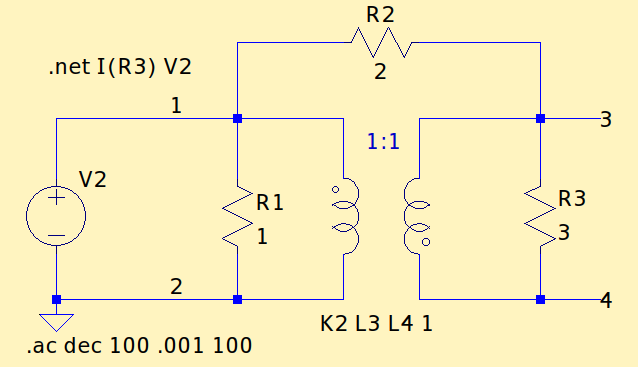


## Ejercicio 2:

Dado el siguiente circuito:

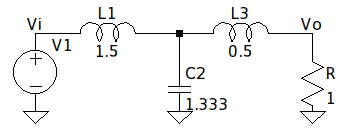

👉 Obtener la transferencia de tensión fracción V subíndice o entre V subíndice i por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si C subíndice 2 igual fracción 4 entre 3 (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario

👉 Construya la matriz de admitancia indefinida (MAI) del circuito.

👉 Compute la transferencia de tensión con la MAI.


# 1. Desarrollo analítico

A continuacíon se adjuntan el desarrollo analítico


In [1]:
from IPython.display import IFrame
IFrame("./TS5.pdf", width=1000, height=1000)

# 2. Simulación numérica circuital Ej1


In [3]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS


#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías + Inicializacion de gráficos para el Notebook


HLP(s): 


<IPython.core.display.Math object>

HHP(s): 


<IPython.core.display.Math object>

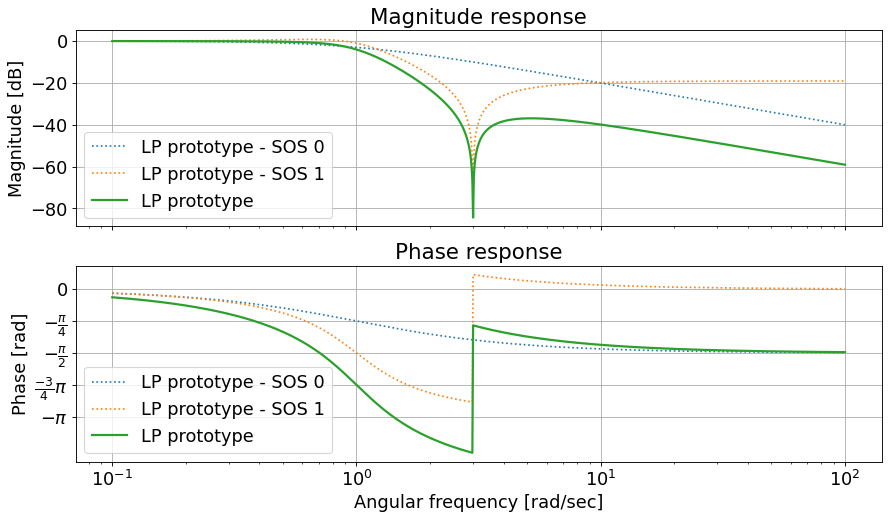

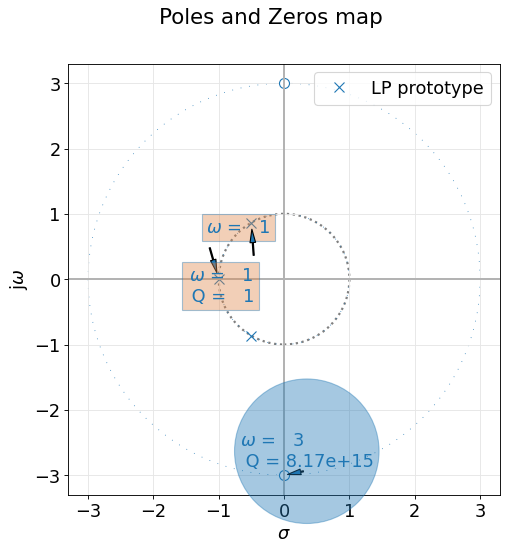

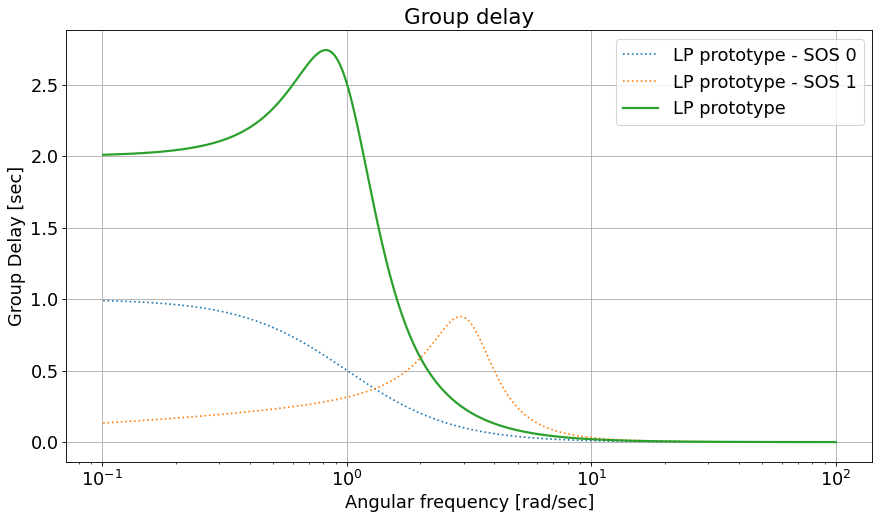

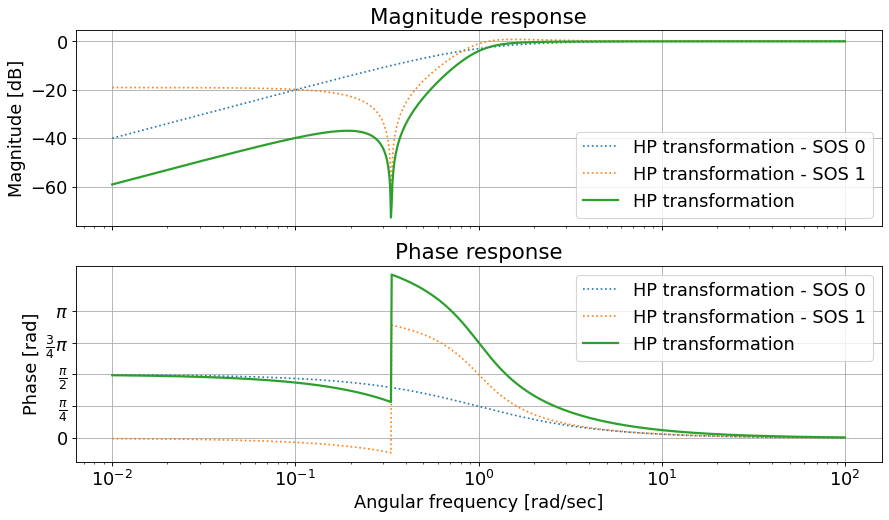

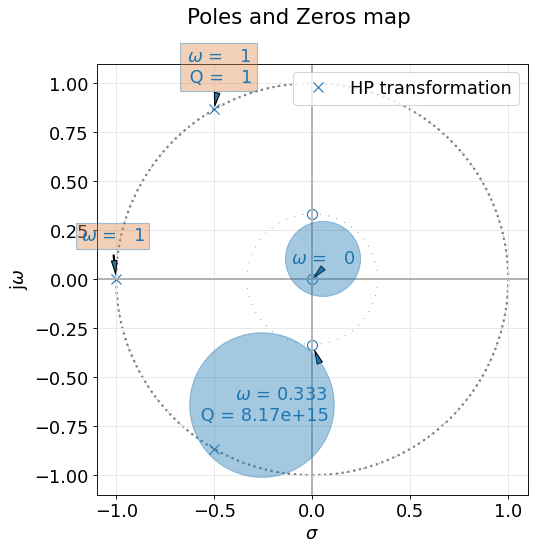

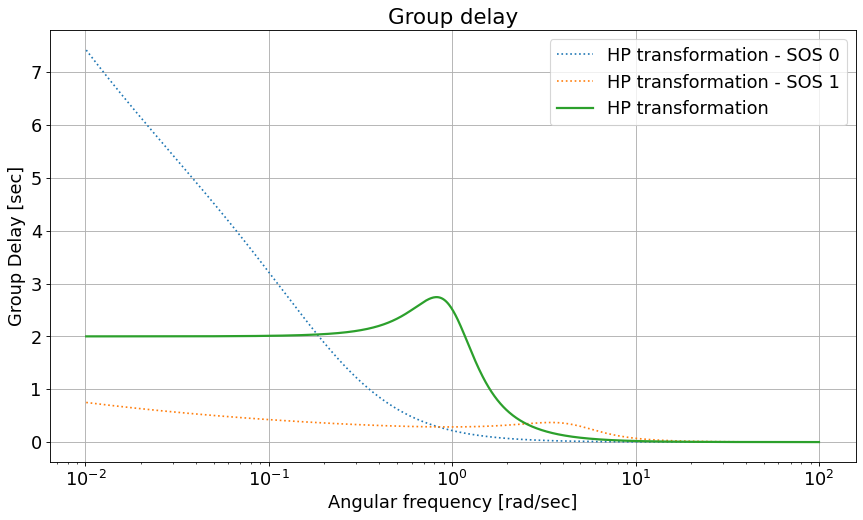

In [4]:


#----------------------Definicion de las variables---------------------
#---- Para el filtro pasa-altos ----
w0 = 1
wze = 1/3

#---- Para el filtro pasa-bajos ----
W0 = 1/w0
Wze = 1/wze

#---- Z P K LP ----
[r1, r2] = np.roots([1, 1, 1])

zLP = [3j, -3j]
pLP = [-1, r1, r2]
kLP = 1/9

#---------------------------Definicion de HLP--------------------------

[numLP, denLP] = ss.zpk2tf(zLP, pLP, kLP)

LP_sos = tf2sos_analog(numLP, denLP)

#-------------------------Transformación LP-HP-------------------------

[numHP, denHP] = ss.lp2hp(numLP, denLP, w0)

[zHP, pHP, kHP] = ss.tf2zpk(numHP, denHP)

HP_sos = tf2sos_analog(numHP, denHP)

#-----------------------------Visualizacion----------------------------

# -------- LP --------
print("HLP(s): ")
LP_sos[LP_sos < 1e-6] = 0.0
pretty_print_SOS(LP_sos, mode='omegayq')
#print("zLP = ", zLP, "\n", "pLP = ", pLP, "\n", "kLP =", kLP)
analyze_sys(LP_sos, "LP prototype")

#print("\n")

# -------- HP --------
print("HHP(s): ")
HP_sos[HP_sos < 1e-6] = 0.0
pretty_print_SOS(HP_sos, mode='omegayq')
analyze_sys(HP_sos, "HP transformation", same_figs=False)

En los graficos resultantes del script de Python se puede observar como se empieza el diseño por un prototipo de maxima planicidad pasabajos y este luego se transforma en el dominio de la frecuencia para lograr el pasaaltos objetivo. Al mismo tiempo se observa como tiene ganancia de -3dB en $\omega_0=1$ normalizada y 0dB en frecuencias mayores. Esto se logra mediante la compensacion de ganancias entre las SOS que componen la transferencia. Tambien se observa que se agrega un único cero en $(\sigma = 0 ; j\omega=0)$.

# Simulacion numerica circuital Ej2


In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.general import print_latex

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn

#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías + Inicializacion de gráficos para el Notebook

In [2]:
#----------------------Definicion de las variables---------------------
S = sp.symbols('S', complex=True)
R = 1
L1 = 1.5
C2 = 4/3
L3= 0.5

Z_C2, Z_L1, Z_L3 = sp.symbols('Z_C2 Z_L1 Z_L3', complex=True)
R1 = sp.symbols('R1', real=True, positive=True)


In [3]:
#---------------------------Definicion de matrices--------------------------

Ta_sym = sp.Matrix([  
                    [ Z_L1 * 1/Z_C2 + 1,     Z_L1],
                    [ 1/Z_C2,                   1]
                ])


Tb_sym = sp.Matrix([  
                    [ Z_L3 * 1/R1 + 1,     Z_L3],
                    [ 1/R1,                   1]
                ])


In [4]:
#---------------------------Definicion de matrices--------------------------

Ta = sp.Matrix([  
                    [ S * L1 * (S * C2) + 1,    S * L1],
                    [ (S * C2),                   1]
                ])


Tb = sp.Matrix([  
                    [ S * L3 * 1/R + 1,     S * L3],
                    [ 1/R,                   1]
                ])


In [5]:
#-------------------------Calculo de la matriz resultante-------------------------

Ttotal_sym = Ta_sym * Tb_sym
Ttotal_sym = sp.simplify(Ttotal_sym)

Ttotal = Ta * Tb
Ttotal = sp.simplify(Ttotal)
# con_detalles = False
con_detalles = True

In [6]:
#-----------------------------Visualizacion----------------------------
print_subtitle('Ta')
print_latex(a_equal_b_latex_s('T_a', Ta))

print_subtitle('Tb')
print_latex(a_equal_b_latex_s('T_b', Tb))

print_subtitle('Ttotal_sym')
print_latex(a_equal_b_latex_s('T_{tot}', Ttotal_sym))

print_subtitle('Ttotal')
print_latex(a_equal_b_latex_s('T_{tot}', Ttotal))


#### Ta

<IPython.core.display.Math object>

#### Tb

<IPython.core.display.Math object>

#### Ttotal_sym

<IPython.core.display.Math object>

#### Ttotal

<IPython.core.display.Math object>

In [7]:
#################################### MAI #########################################

Ymai = sp.Matrix([  
                    [ 1/(S * Z_L1),           0,              0,             -1/(S * Z_L1)],
                    [ 0,            1/(S * Z_L3) + 1/R1,    -1/R1,          -1/(S * Z_L3)],
                    [ 0,                    -1/R1,      1/R1 + S * Z_C2,     -S * Z_C2],
                    [ -1/(S * Z_L1),      -1/(S * Z_L3),     -S * Z_C2,      1/(S * Z_L1) + 1/(S * Z_L3) + S * Z_C2 ]
                 ])

# con_detalles = False
con_detalles = True

# Calculo la transf a partir de la MAI

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, 1, 2, 0, 2, verbose=con_detalles)
Vmai = sp.simplify(Vmai)
print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(1, 2, 0, 2) +  sp.latex(Vmai))

# Calculo la Z en el puerto de entrada a partir de la MAI
Zmai = calc_MAI_impedance_ij(Ymai, 0, 2, verbose=con_detalles)
print_latex( r'Z_{{ {:d}{:d} }} = '.format(0,2) +  sp.latex(Zmai) )


Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# 3. Simulación en LTSpice del circuito Ej 1

Se realizó la simulación circuital del filtro

A continuación, se muestran el circuito activo y su transferencia

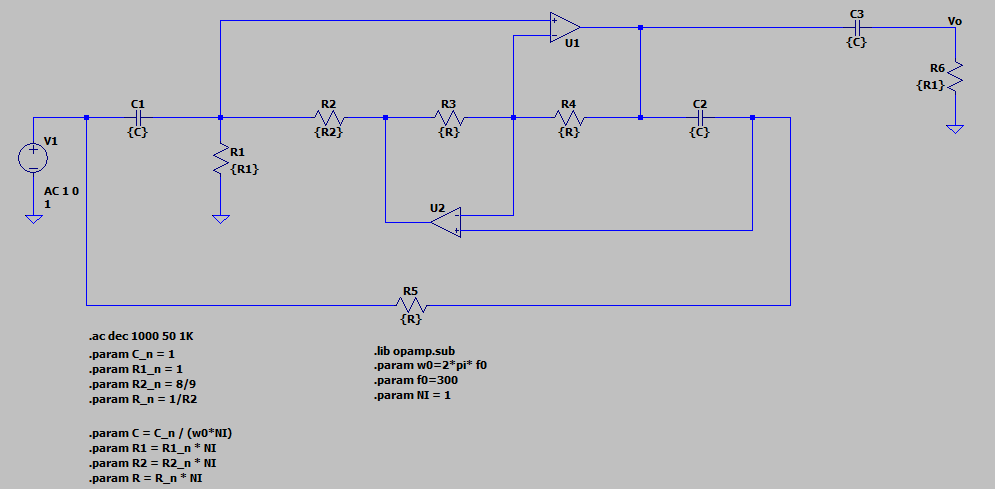

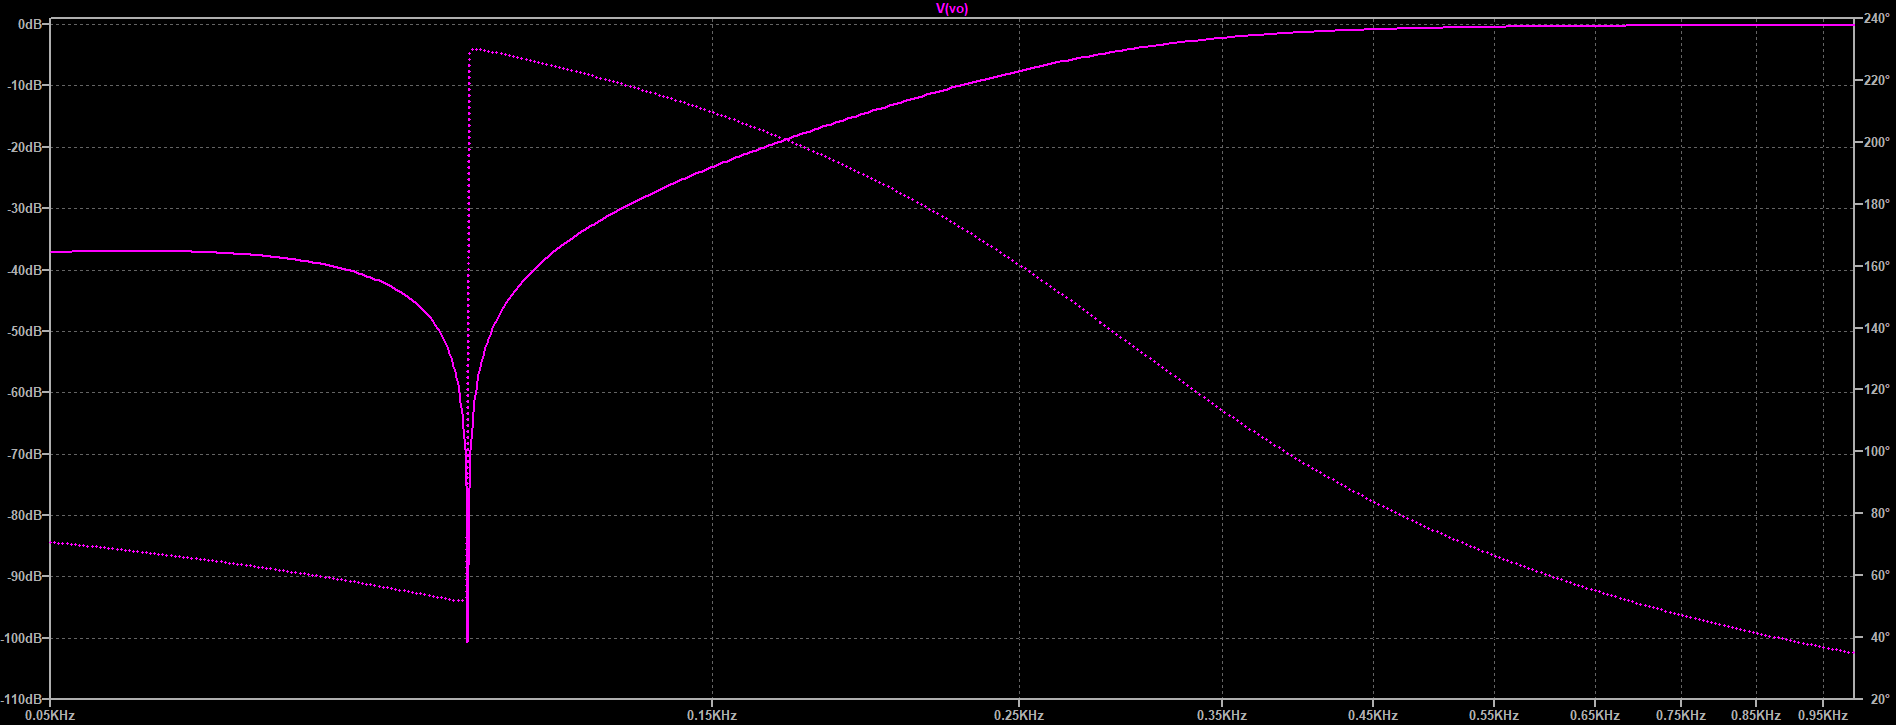

Se le hace zoom a la transferencia para analizar el comportamiento en $\omega_{0}$ y $\omega_{Ze}$, señalizadas con los cursores

$|T(\omega = \omega_{0})| = -4dB$, no verifica que $\alpha_{max} < 3dB$ 

$|T(\omega = \omega_{Ze})| = -100dB$,  verifica que $|T(\omega = \omega_{Ze})| \rightarrow  -\infty$ 

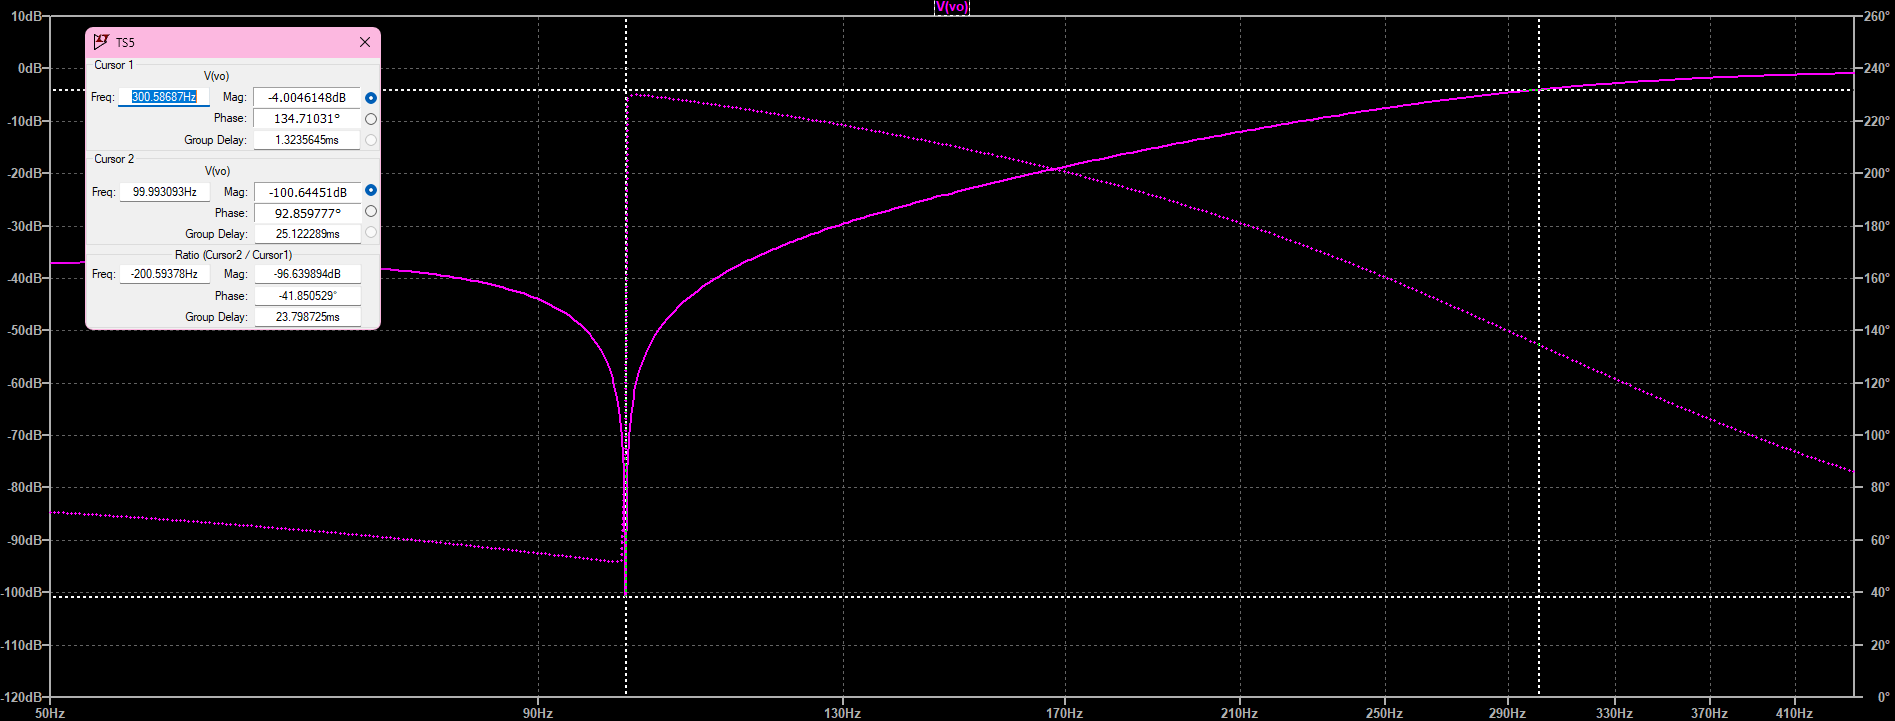




# 3. Simulación en LTSpice del circuito Ej 2

Se realizó la simulación circuital 

A continuación, se muestran el circuito y su transferencia

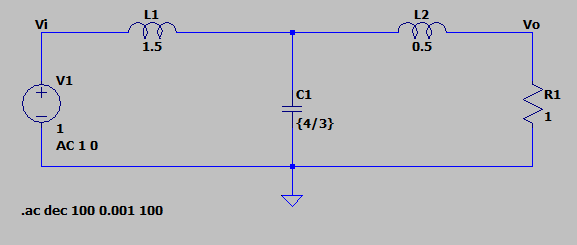

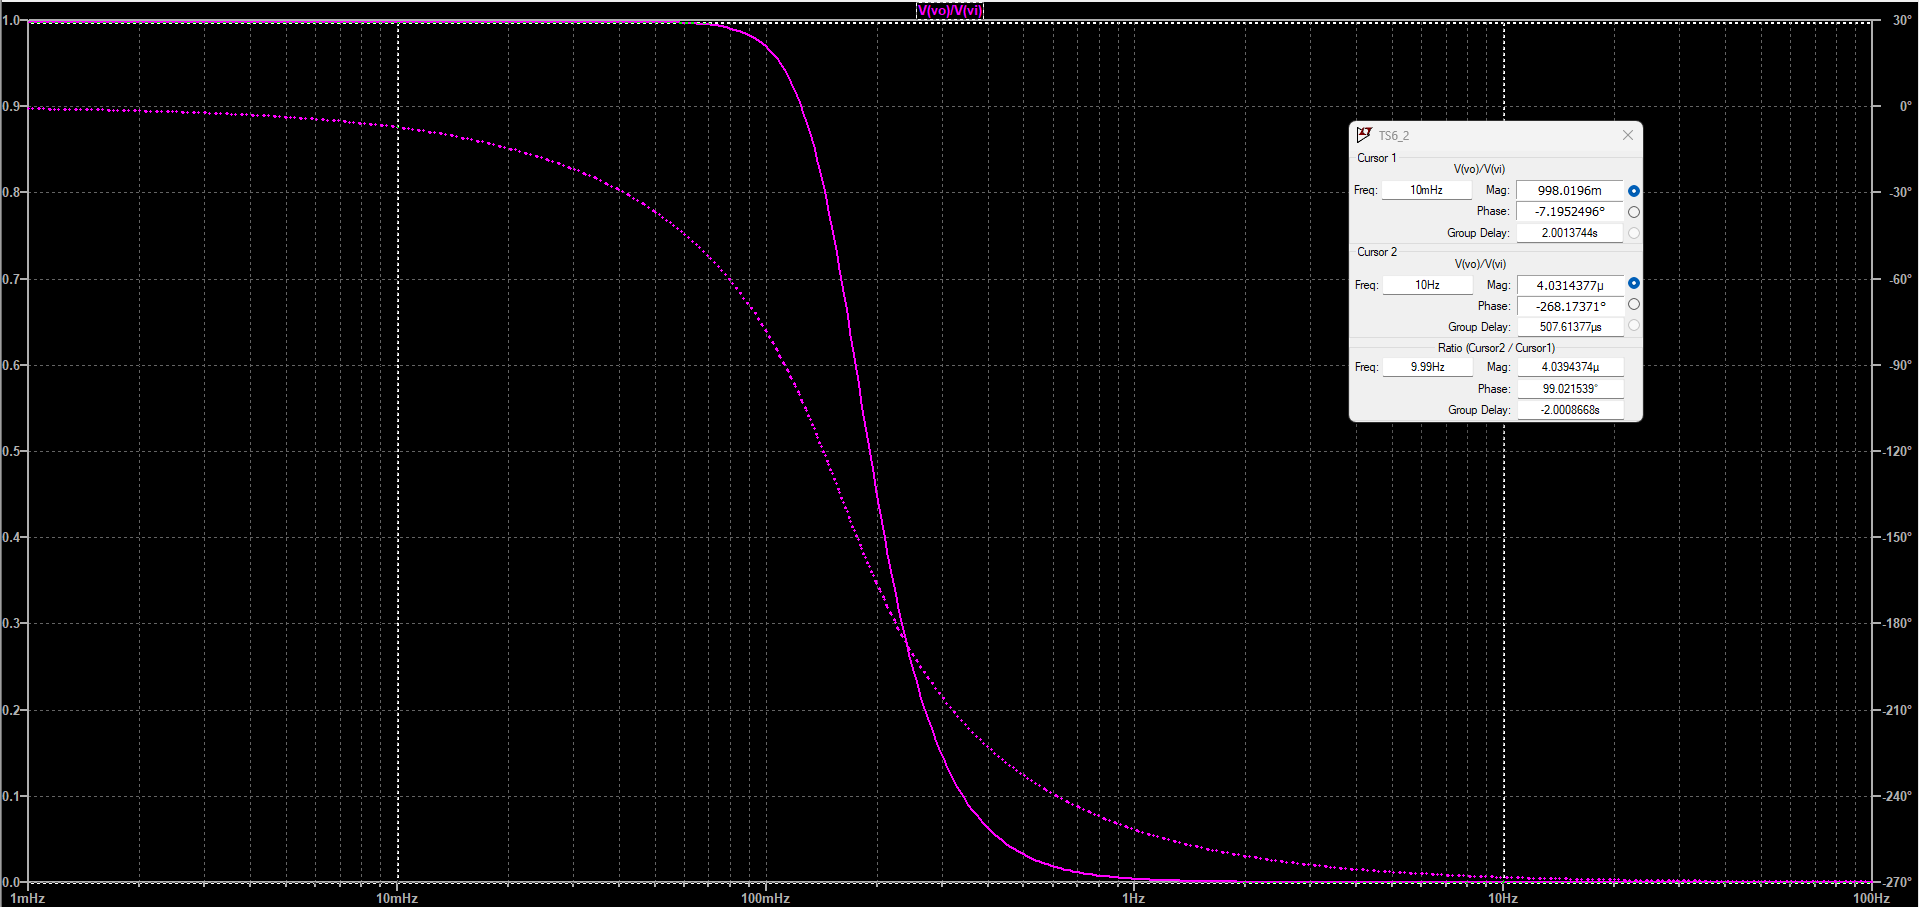

Se le hace zoom a la transferencia para analizar el comportamiento en $\omega_{0}$ y $\omega_{\infty}$, señalizadas con los cursores

$|T(\omega = \omega_{0})| = 1$ 

$|T(\omega = \omega_{\infty})| = 0$

# 4. Conclusiones

## Ej1 

- Se verifica la correcta transformación y diseño del filtro
- Se observa que, a pesar de ser de máxima planicidad, no se obtienen -3dB en la frecuencia de corte
- Se observa que, en este caso, el circuito tiene un correcto funcionamiento normalizado, a diferencia del de la TS4 BisBis

## Ej2

- Se verifica la transferencia, tanto con la MAI como en LTSpice    
- 